## Assignment Finite volumes by hand - solution

In [1]:
from IPython.display import Image

## The problem

Consider the two-dimensional diffusion problem below. There are zero-flux boundary conditions on the top and bottom of the domain, and prescribed concentration (more generally known as Dirichlet or first-type boundary conditions)on the to sides. Each gridblock is the same dimension $\Delta x = \Delta y = 200~m$, and $\Delta z= 3~m$ (out of the page).  The gridblock node is placed at Dirichlet (prescribed concentration) boundaries. The diffusion coefficient in each gridblock is as shown in the figure and the porosity is $\theta = 0.25$ is the same everywhere.

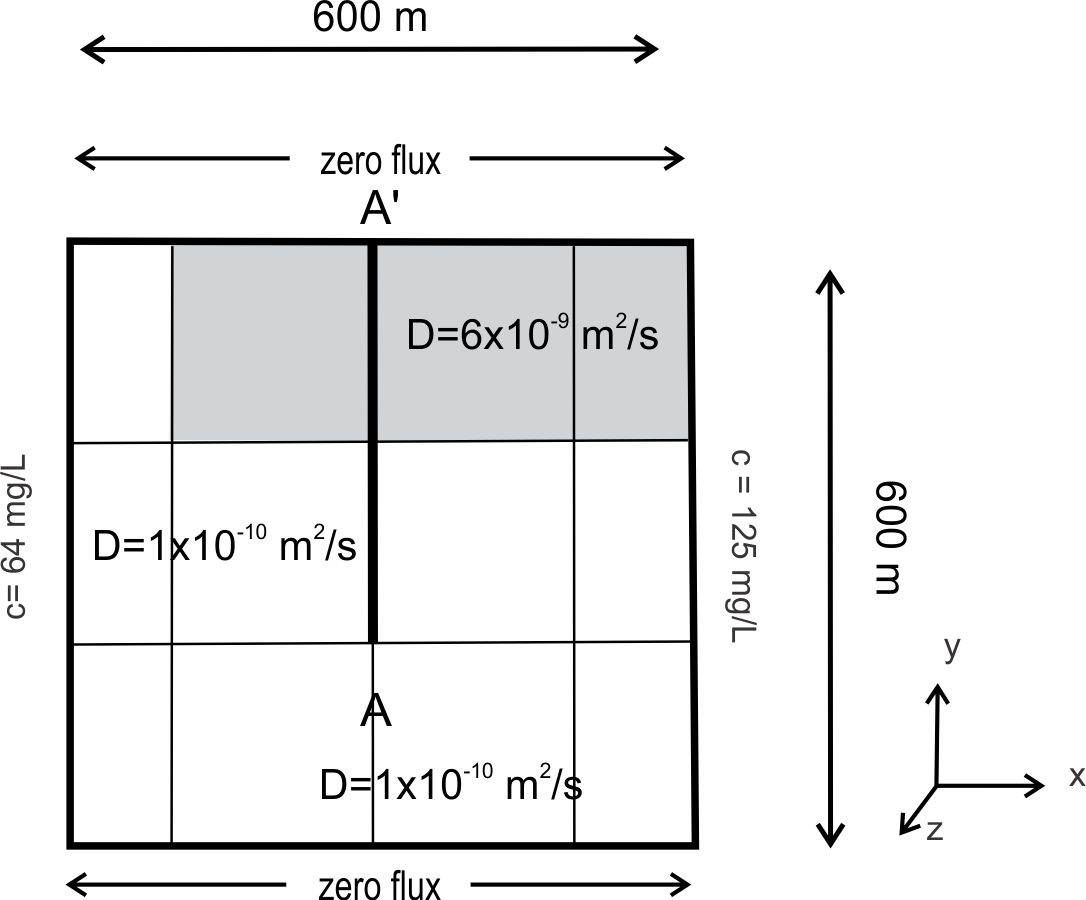

In [2]:
Image("figures/by_hand.png",width="50%")

### Q1 Write your 2d Stencil

In the cell below, enter your stencil in markdown.

\begin{align}
&\left(D\theta {c_E - c_C \over \Delta x} +   D\theta {c_W - c_C \over \Delta x}   \right) (\Delta y) (\Delta z) +\left(D\theta {c_N - c_C \over \Delta y} +   D\theta {c_S - c_C \over \Delta y}   \right) (\Delta x) (\Delta z) =0 \label{8fvbh20}
\end{align}

You may also want to simplify your stencil for the case of constant diffusion coefficient and constant gridblock dimensions.

For constant diffusion and porosity, and $\Delta x = \Delta y$:

\begin{align}
&\left({c_E - c_C } +   {c_W - c_C }   \right)  +\left({c_N - c_C } +   {c_S - c_C }   \right)  =0 \label{8fvbh21}\\
\Rightarrow\qquad&c_N + c_S + c_E + c_W - 4 c_C = 0 \label{8fvbh22}
\end{align}


### The equations for each gridblock in the mesh.

How many unknowns are there? In the 2-d problem above, we have 3 rows and 4 columns so **12 unknowns** in total.

Python is organized so that so-called **row-major** numbering is the most efficient. That means we should number our gridblocks as shown here:

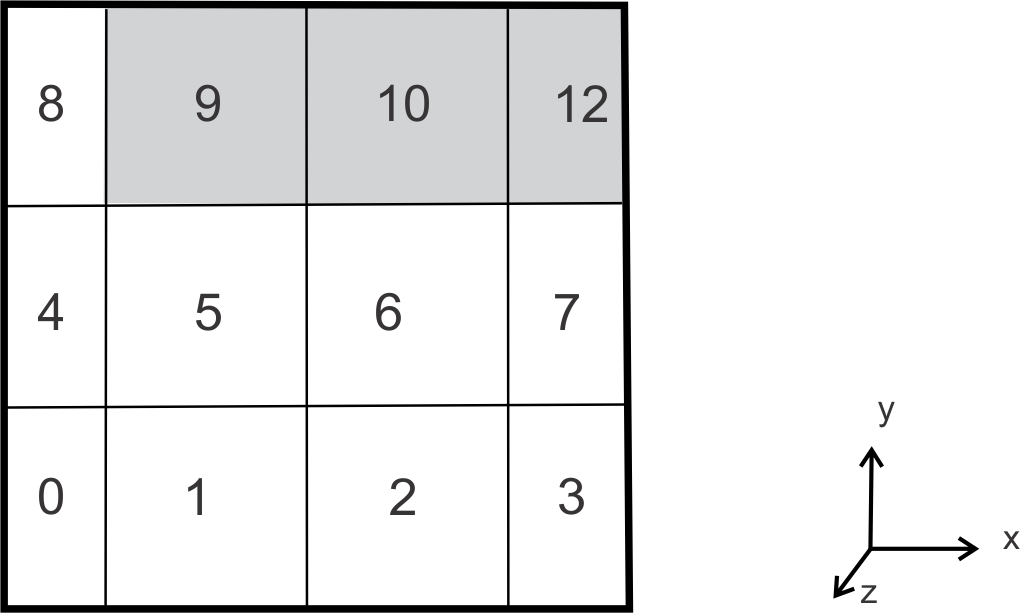

In [3]:
Image("figures/by_hand_numbered.png",width="50%")

### Q3 Put your equations into the matrix

I've put some of the easy ones in. You do the rest by replacing the zeros in the markdown array below with the correct coefficients from your equations.

\begin{align*} \mathbf{Ac} &= \mathbf{b}\\ 
{\begin{bmatrix} 
1 & 0 & 0 & 0 & 0 &0 &0 &0 &0 &0 &0 &0\\
1 & -3& 1 & 0 & 0 &1 &0 &0 &0 &0 &0 &0 \\
0 & 1 & -3& 1 & 0 &0 &1 &0 &0 &0 &0 &0 \\
0 & 0 & 0 & 1 & 0 &0 &0 &0 &0 &0 &0 &0 \\
0 & 0 & 0 & 0 & 1 &0 &0 &0 &0 &0 &0 &0 \\
0 & 1 & 0 & 0 & 1 &-4&1 &0 &0 &1 &0 &0 \\
0 & 0 & 1 & 0 & 0 &1 &-4&1 &0 &0 &1 &0 \\
0 & 0 & 0 & 0 & 0 &0 &0 &1 &0 &0 &0 &0 \\
0 & 0 & 0 & 0 & 0 &0 &0 &0 &1 &0 &0 &0 \\
0 & 0 & 0 & 0 & 0 &1 &0 &0 &1 &-3&1 &0 \\
0 & 0 & 0 & 0 & 0 &0 &1 &0 &0 &1 &-3&1 \\
0 & 0 & 0 & 0 & 0 &0 &0 &0 &0 &0 &0 &1 \\
\end{bmatrix}} 
\begin{bmatrix} 
c_0\\ 
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6\\ 
c_7\\ 
c_8\\ 
c_9\\ 
c_{10}\\ 
c_{11}\\
\end{bmatrix} 
&= \begin{bmatrix} 
64\\ 
0\\ 
0\\ 
125\\ 
64\\ 
0\\ 
0\\
125\\ 
64\\ 
0\\ 
0\\ 
125\\ 
\end{bmatrix} \end{align*}
<br><br>

### Q4 Solve the system of equations


<br><br> 


\begin{align}
\begin{bmatrix} 
c_0\\ 
c_1\\ 
c_2\\ 
c_3\\ 
c_4\\ 
c_5\\ 
c_6\\ 
c_7\\ 
c_8\\ 
c_9\\ 
c_{10}\\ 
c_{11}\\
\end{bmatrix} 
&= \begin{bmatrix} 
64\\ 
84.333\\ 
104.667\\ 
125\\ 
64\\ 
84.333\\ 
104.667\\ 
125\\ 
64\\ 
84.333\\ 
104.667\\  
125\\ 
\end{bmatrix}
\end{align}

### Check your answer

Take the equation for any gridblock and substitute in the concentrations you computed. Is the equation satisfied?
<br><br> 
Consider equation for gridblock 5: $c_1 + c_4 +c_6 + c_9 - 4 c_5 = 0$?

In [4]:
84.333333 + 64. + 104.666667 + 84.333333 - 4.* 84.333333

9.999999974752427e-07